In [1]:
import pandas as pd

In [2]:
dados = pd.read_csv('car-prices.csv', sep=',')

In [3]:
dados.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [4]:
a_renomear = {
    'mileage_per_year':'milhas_por_ano',
    'model_year':'ano_do_modelo',
    'price':'preco',
    'sold':'vendido'
}
dados = dados.rename(columns = a_renomear)
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [5]:
a_trocar = {
    'no': 0,
    'yes': 1
}
dados.vendido = dados.vendido.map(a_trocar)
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido
0,0,21801,2000,30941.02,1
1,1,7843,1998,40557.96,1
2,2,7109,2006,89627.50,0
3,3,26823,2015,95276.14,0
4,4,7935,2014,117384.68,1


In [6]:
from datetime import datetime
ano_atual = datetime.today().year
dados['idade_do_modelo'] = ano_atual - dados.ano_do_modelo
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido,idade_do_modelo
0,0,21801,2000,30941.02,1,22
1,1,7843,1998,40557.96,1,24
2,2,7109,2006,89627.50,0,16
3,3,26823,2015,95276.14,0,7
4,4,7935,2014,117384.68,1,8


In [7]:
dados['km_por_ano'] = dados.milhas_por_ano * 1.60934
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido,idade_do_modelo,km_por_ano
0,0,21801,2000,30941.02,1,22,35085.22134
1,1,7843,1998,40557.96,1,24,12622.05362
2,2,7109,2006,89627.50,0,16,11440.79806
3,3,26823,2015,95276.14,0,7,43167.32682
4,4,7935,2014,117384.68,1,8,12770.11290


In [8]:
dados = dados.drop(columns = ['Unnamed: 0', 'milhas_por_ano',
                          'ano_do_modelo'], axis = 1)
dados.head()

,preco,vendido,idade_do_modelo,km_por_ano
0,30941.02,1,22,35085.22134
1,40557.96,1,24,12622.05362
2,89627.50,0,16,11440.79806
3,95276.14,0,7,43167.32682
4,117384.68,1,8,12770.11290


In [9]:
x = dados[['preco', 'idade_do_modelo', 'km_por_ano']]
y = dados['vendido']

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
import numpy as np
SEED = 5
np.random.seed(SEED)


treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, 
                                                        random_state = SEED, test_size = 0.25,
                                                       stratify = y)
print(treino_x.shape)
print(teste_x.shape)


model = LinearSVC()
model.fit(treino_x, treino_y)
previsoes = model.predict(teste_x)
acuracia = accuracy_score(teste_y, previsoes) * 100
print('Treinaremos com %d elementos e testaremos com %d elementos' %(len(treino_x), len(teste_x)))
print('A acurácia foi de %.2f%%' % acuracia)

(7500, 3)
(2500, 3)
Treinaremos com 7500 elementos e testaremos com 2500 elementos
A acurácia foi de 47.24%


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [11]:
from sklearn.dummy import DummyClassifier
dummy_stratified = DummyClassifier()
dummy_stratified.fit(treino_x, treino_y)
previsoes = dummy_stratified.predict(teste_x)
acuracia = accuracy_score(teste_y, previsoes) * 100
print('Treinaremos com %d elementos e testaremos com %d elementos' %(len(treino_x), len(teste_x)))
print('A acurácia do dummy stratified foi de %.2f%%' % acuracia)

Treinaremos com 7500 elementos e testaremos com 2500 elementos
A acurácia do dummy stratified foi de 58.00%


In [12]:
from sklearn.dummy import DummyClassifier
dummy_most_frequent = DummyClassifier()
dummy_most_frequent.fit(treino_x, treino_y)
previsoes = dummy_most_frequent.predict(teste_x)
acuracia = accuracy_score(teste_y, previsoes) * 100
print('Treinaremos com %d elementos e testaremos com %d elementos' %(len(treino_x), len(teste_x)))
print('A acurácia do dummy most_frequent foi de %.2f%%' % acuracia)

Treinaremos com 7500 elementos e testaremos com 2500 elementos
A acurácia do dummy most_frequent foi de 58.00%


In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
import numpy as np
SEED = 5
np.random.seed(SEED)


raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, 
                                                        random_state = SEED, test_size = 0.25,
                                                       stratify = y)
print('Treinaremos com %d elementos e testaremos com %d elementos' %(len(treino_x), len(teste_x)))


scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(teste_x)

model = LinearSVC()
model.fit(treino_x, treino_y)
previsoes = model.predict(teste_x)
acuracia = accuracy_score(teste_y, previsoes) * 100

print('A acurácia foi de %.2f%%' % acuracia)

Treinaremos com 7500 elementos e testaremos com 2500 elementos
A acurácia foi de 71.00%


In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np
SEED = 5
np.random.seed(SEED)


raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, 
                                                        random_state = SEED, test_size = 0.25,
                                                       stratify = y)
print('Treinaremos com %d elementos e testaremos com %d elementos' %(len(treino_x), len(teste_x)))


scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(teste_x)

model = SVC()
model.fit(treino_x, treino_y)
previsoes = model.predict(teste_x)
acuracia = accuracy_score(teste_y, previsoes) * 100

print('A acurácia foi de %.2f%%' % acuracia)

Treinaremos com 7500 elementos e testaremos com 2500 elementos
A acurácia foi de 58.00%


In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import numpy as np
SEED = 5
np.random.seed(SEED)


raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, 
                                                        random_state = SEED, test_size = 0.25,
                                                       stratify = y)
print('Treinaremos com %d elementos e testaremos com %d elementos' %(len(treino_x), len(teste_x)))


model = DecisionTreeClassifier(max_depth=3)
model.fit(treino_x, treino_y)
previsoes = model.predict(raw_teste_x)
acuracia = accuracy_score(teste_y, previsoes) * 100

print('A acurácia foi de %.2f%%' % acuracia)

Treinaremos com 7500 elementos e testaremos com 2500 elementos
A acurácia foi de 58.00%


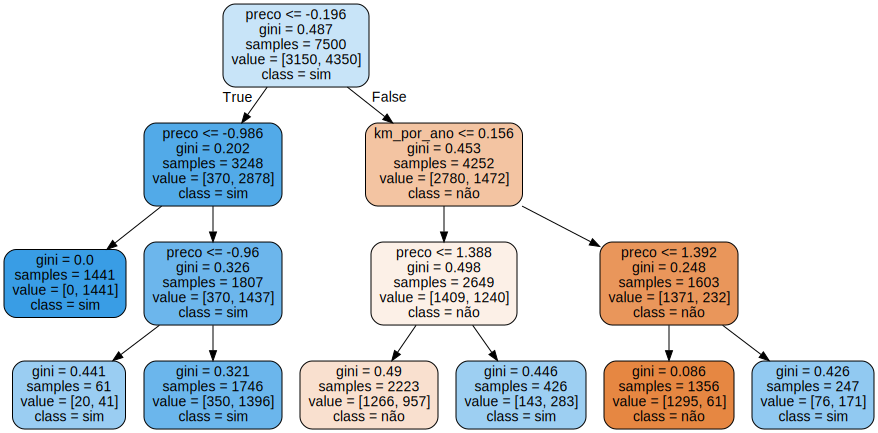

In [16]:
from sklearn.tree import export_graphviz
import graphviz
features = x.columns
dot_data = export_graphviz(model, out_file=None, filled= True, rounded=True, class_names=['não', 'sim'],
                          feature_names = features)
grafico = graphviz.Source(dot_data)
grafico